# What is Internet Traffic Prediction?

The goal is to predict internet traffic using a time-series forecasting technique to optimize resource allocation. Many real-world organizations, such as e-commerce retailers like Amazon, Ebay, and others, use such applications to predict and monitor internet traffic.Forecast the Internet traffic in this project using time-series models as ARIMA and Holt-Winters. This project involves comparing the performance of the time-series prediction models designed of different approaches. 

# About Dataset

This dataset consists of about 173 rows daywise website vistiors consisting of Internet traffic prediction.Our aim is train our model so that it can correctly predict whether a given daywise website vistiors.The daywise website vistiors data is given into one separate datasets. In this datasets consisting around 4031 daily visitors.

# 1. Import Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# 2. Load and check Data

In [2]:
traffic_data = pd.read_csv('Website_Vistiors_Daywise.csv')

In [3]:
traffic_data

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870
...,...,...
168,18-03-2022,2494
169,19-03-2022,2976
170,20-03-2022,2534
171,21-03-2022,3641


# 3. EDA

In [4]:
traffic_data.info() #173 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            173 non-null    object
 1   Daily Visitors  173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [5]:
traffic_data.shape

(173, 2)

In [6]:
traffic_data.describe()

,Daily Visitors
count,173.000000
mean,2829.907514
std,765.194741
min,1245.000000
25%,2336.000000
50%,2751.000000
75%,3207.000000
max,7165.000000


In [7]:
traffic_data.head()

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870


In [8]:
traffic_data.tail()

,Date,Daily Visitors
168,18-03-2022,2494
169,19-03-2022,2976
170,20-03-2022,2534
171,21-03-2022,3641
172,22-03-2022,4031


In [9]:
#counting year wise date from Website Vistiors data
#counting unique years from date feature of Website Vistiors data
traffic_data["Date"] = pd.to_datetime(traffic_data["Date"])
yr_count = traffic_data["Date"].dt.year.value_counts()
yr_count
#92 Website Vistiors from 2021 and 81 Website Vistiors from 2022

2021    92
2022    81
Name: Date, dtype: int64

In [10]:
#creating year column in Website Vistiors data
traffic_data["year"] = traffic_data["Date"].dt.year
traffic_data.head()

,Date,Daily Visitors,year
0,2021-01-10,2649,2021
1,2021-02-10,2000,2021
2,2021-03-10,2011,2021
3,2021-04-10,3219,2021
4,2021-05-10,3870,2021


In [11]:
#Datatype
traffic_data.dtypes

Date              datetime64[ns]
Daily Visitors             int64
year                       int64
dtype: object

In [12]:
traffic_data.info() #173 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            173 non-null    datetime64[ns]
 1   Daily Visitors  173 non-null    int64         
 2   year            173 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.2 KB


In [13]:
print('Unique values of Daily Visitors in df dataset: \n', traffic_data['Daily Visitors'].value_counts())

Unique values of Daily Visitors in df dataset: 
 2594    2
2534    2
2343    1
3184    1
3565    1
       ..
2239    1
3106    1
3403    1
3371    1
4031    1
Name: Daily Visitors, Length: 171, dtype: int64


In [14]:
traffic_data.head(10)

,Date,Daily Visitors,year
0,2021-01-10,2649,2021
1,2021-02-10,2000,2021
2,2021-03-10,2011,2021
3,2021-04-10,3219,2021
4,2021-05-10,3870,2021
5,2021-06-10,3222,2021
6,2021-07-10,2906,2021
7,2021-08-10,2821,2021
8,2021-09-10,2500,2021
9,2021-10-10,2108,2021


In [15]:
traffic_data.isnull().sum() #checking missing values

Date              0
Daily Visitors    0
year              0
dtype: int64

In [16]:
#checking duplicate rows
traffic_data[traffic_data.duplicated()].shape #0 duplicate rows

(0, 3)

In [18]:
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'])

In [19]:
# Set the Date column as the index
traffic_data.set_index('Date', inplace=True)

# Visualization

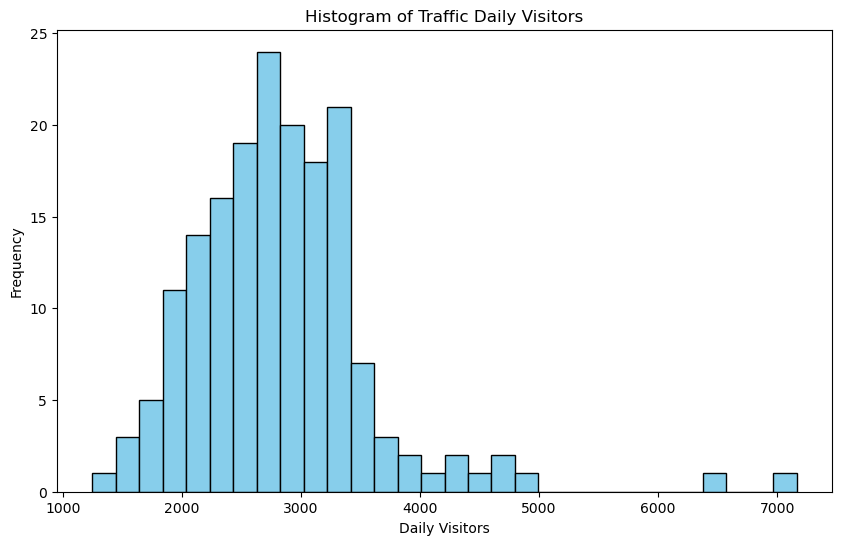

In [33]:
# Plot a histogram of traffic Daily Visitors over time
plt.figure(figsize=(10, 6))
plt.hist(traffic_data['Daily Visitors'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Daily Visitors')
plt.ylabel('Frequency')
plt.title('Histogram of Traffic Daily Visitors')
plt.show()

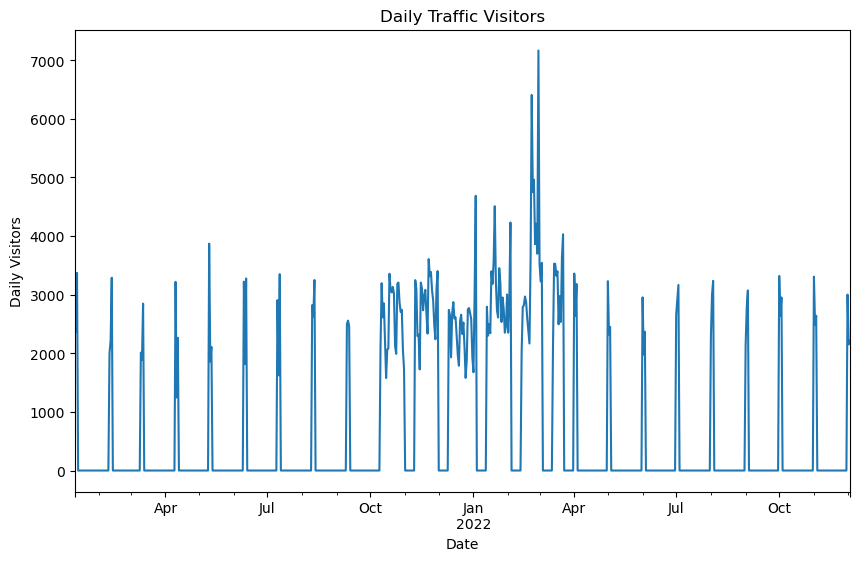

In [34]:
# Create a line plot to visualize daily traffic changes
plt.figure(figsize=(10, 6))
traffic_data['Daily Visitors'].resample('D').sum().plot()
plt.xlabel('Date')
plt.ylabel('Daily Visitors')
plt.title('Daily Traffic Visitors')
plt.show()

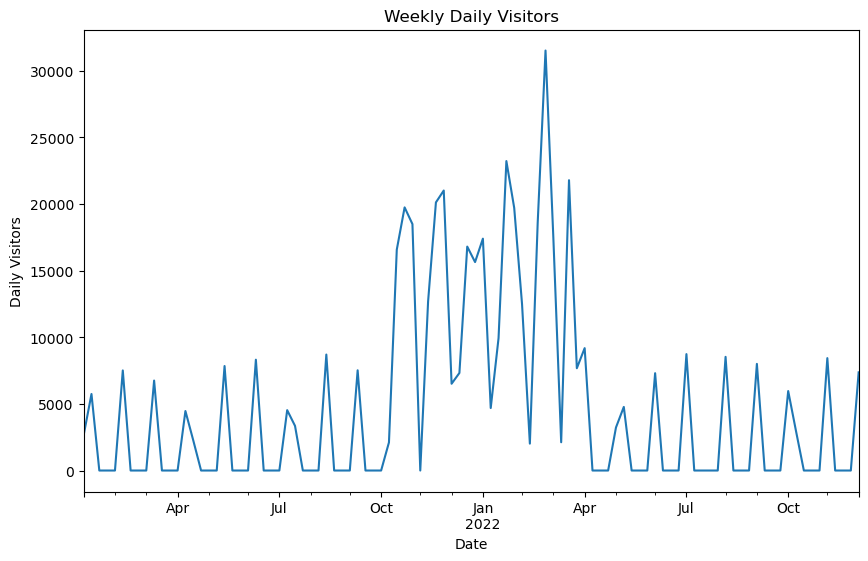

In [35]:
# Create a line plot to visualize weekly traffic changes
plt.figure(figsize=(10, 6))
traffic_data['Daily Visitors'].resample('W').sum().plot()
plt.xlabel('Date')
plt.ylabel('Daily Visitors')
plt.title('Weekly Daily Visitors')
plt.show()

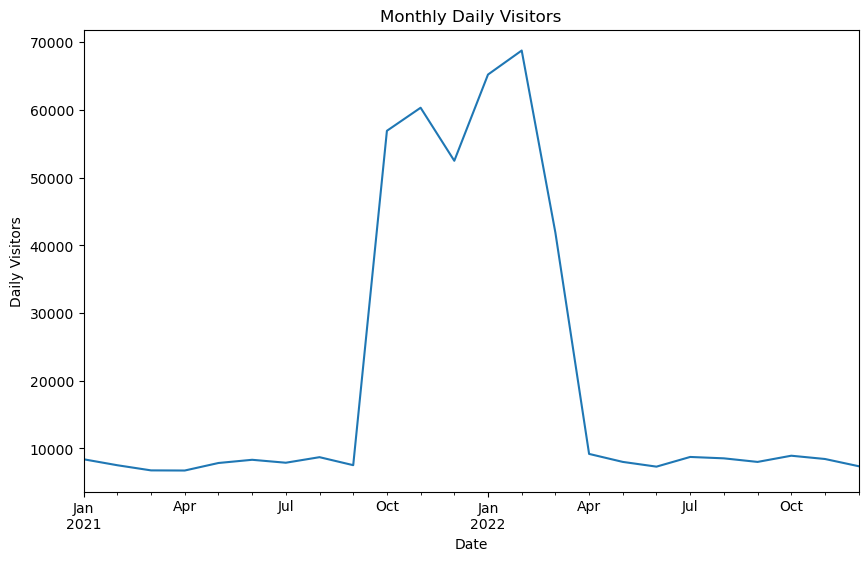

In [36]:
# Create a line plot to visualize monthly traffic changes
plt.figure(figsize=(10, 6))
traffic_data['Daily Visitors'].resample('M').sum().plot()
plt.xlabel('Date')
plt.ylabel('Daily Visitors')
plt.title('Monthly Daily Visitors')
plt.show()

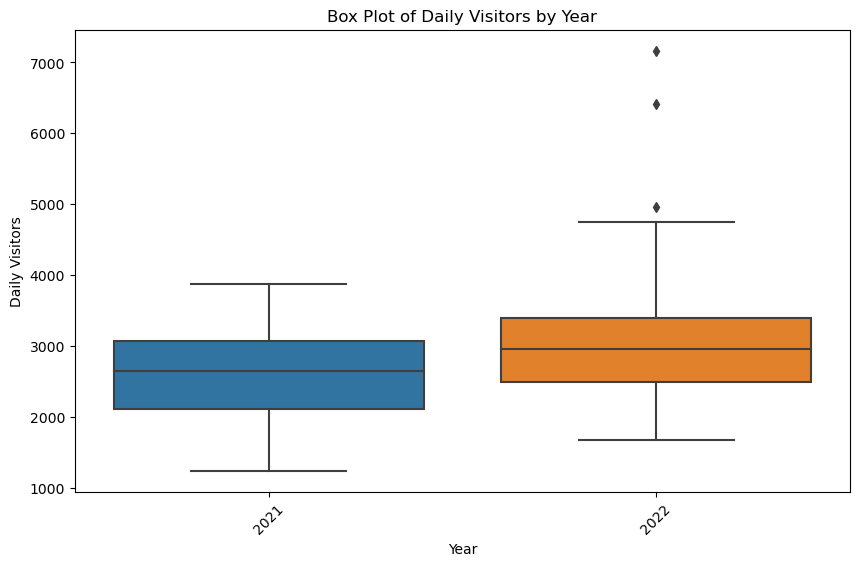

In [84]:
# Generate a box plot to identify outliers and variations
plt.figure(figsize=(10, 6))
tarplot =sns.boxplot(x=traffic_data.index.year, y='Daily Visitors', data=traffic_data)
plt.xlabel('Year')
plt.ylabel('Daily Visitors')
plt.title('Box Plot of Daily Visitors by Year')
plt.xticks(rotation=45)
plt.show()

# Traffic Distribution

In [38]:
# Assuming 'Daily Visitors' is the column representing traffic Daily Visitors
traffic_Daily_Visitors = traffic_data['Daily Visitors']

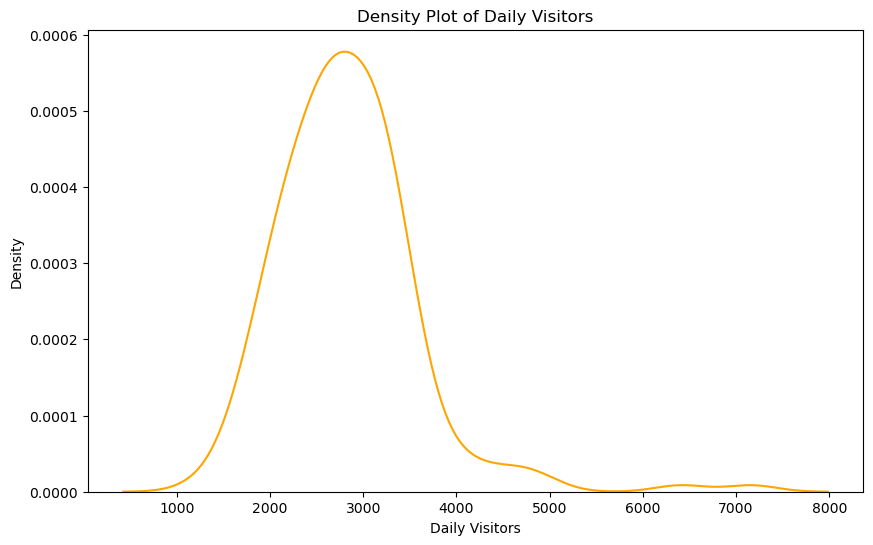

In [40]:
# Plot a density plot of traffic volume
plt.figure(figsize=(10, 6))
sns.kdeplot(traffic_Daily_Visitors, color='orange')
plt.xlabel('Daily Visitors')
plt.ylabel('Density')
plt.title('Density Plot of Daily Visitors')
plt.show()

In [41]:
# Calculate summary statistics
mean_volume = traffic_Daily_Visitors.mean()
median_volume = traffic_Daily_Visitors.median()
std_volume = traffic_Daily_Visitors.std()
min_volume = traffic_Daily_Visitors.min()
max_volume = traffic_Daily_Visitors.max()

In [42]:
print("Summary Statistics for traffic_Daily_Visitors:")
print(f"Mean: {mean_volume:.2f}")
print(f"Median: {median_volume:.2f}")
print(f"Standard Deviation: {std_volume:.2f}")
print(f"Minimum: {min_volume}")
print(f"Maximum: {max_volume}")

Summary Statistics for traffic_Daily_Visitors:
Mean: 2829.91
Median: 2751.00
Standard Deviation: 765.19
Minimum: 1245
Maximum: 7165


# Temporal Analysis

In [44]:
# Resample data to a suitable frequency (e.g., hourly, daily)
resampled_data = traffic_data['Daily Visitors'].resample('H').sum()

In [45]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(resampled_data, model='additive')

<Figure size 1200x800 with 0 Axes>

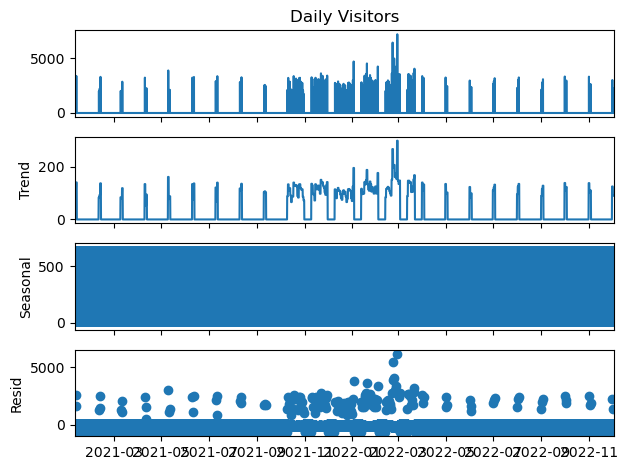

In [54]:
# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [47]:
# Identify peak hours or days
peak_hours = resampled_data.groupby(resampled_data.index.hour).mean()
peak_days = resampled_data.groupby(resampled_data.index.dayofweek).mean()

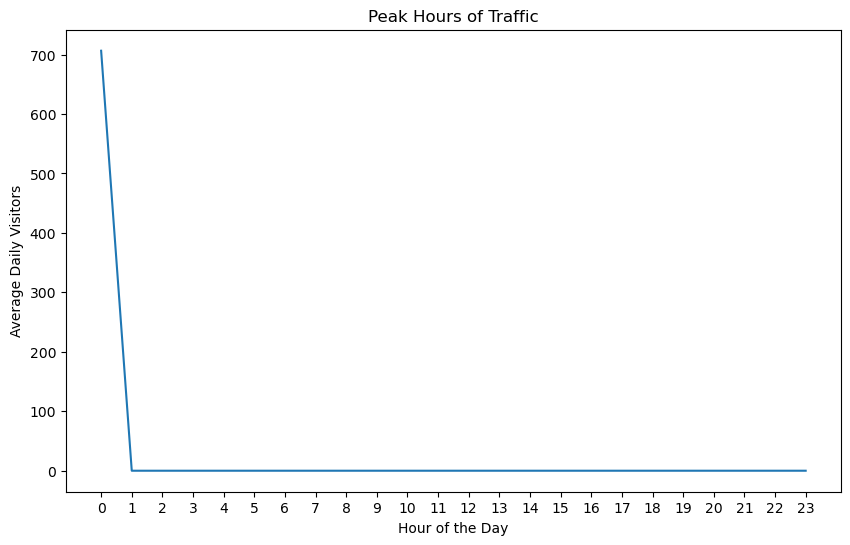

In [48]:
# Plot peak hours
plt.figure(figsize=(10, 6))
sns.lineplot(x=peak_hours.index, y=peak_hours.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Daily Visitors')
plt.title('Peak Hours of Traffic')
plt.xticks(range(24))
plt.show()

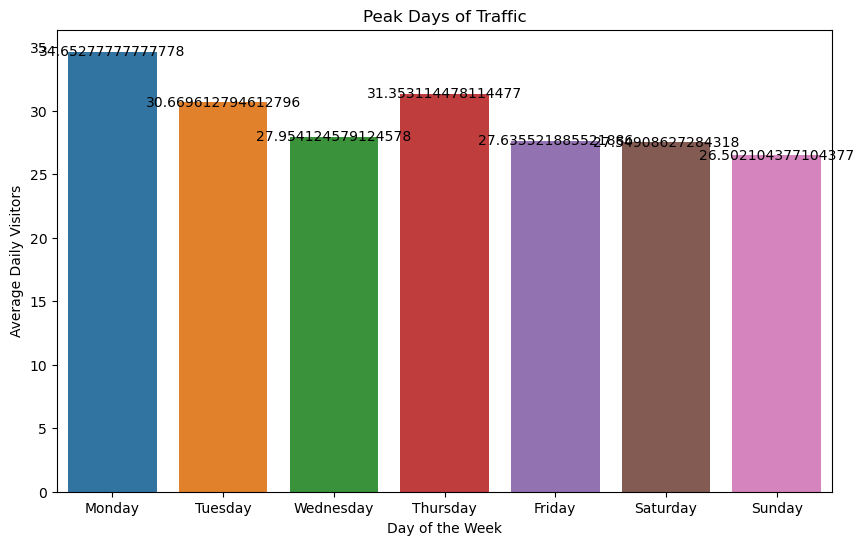

In [90]:
# Plot peak days
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
tarplot =sns.barplot(x=day_names, y=peak_days.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Visitors')
for p in tarplot.patches:
    tarplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.title('Peak Days of Traffic')
plt.show()

# Correlation Analysis

In [55]:
# Assuming you have additional variables like 'time_of_day', 'day_of_week', 'weather_condition'
# Extract the hour of the day and day of the week from the timestamp
traffic_data['hour_of_day'] = traffic_data.index.hour
traffic_data['day_of_week'] = traffic_data.index.dayofweek

In [56]:
# Calculate correlation coefficients (Pearson and Spearman) between traffic volume and other variables
correlation_pearson = traffic_data.corr(method='pearson')
correlation_spearman = traffic_data.corr(method='spearman')

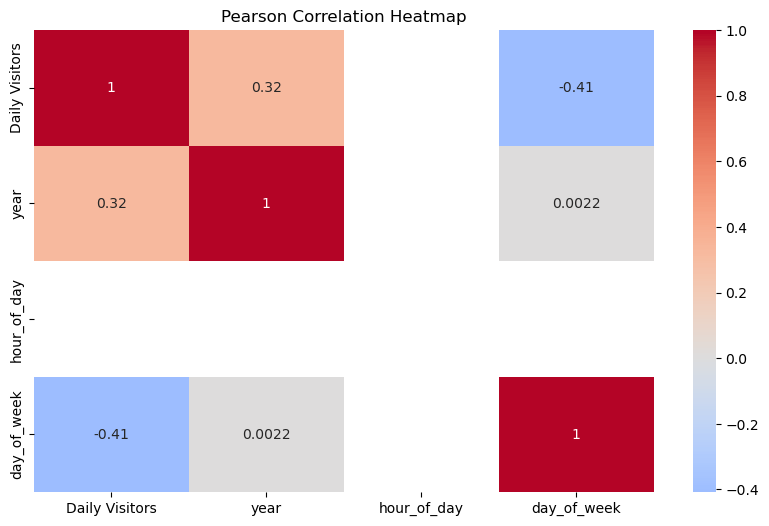

In [57]:
# Create a heatmap for Pearson correlation coefficients
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Heatmap')
plt.show()

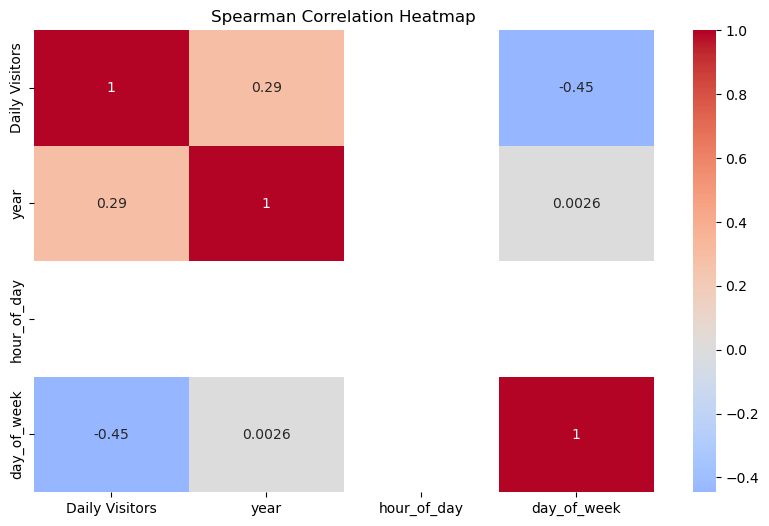

In [58]:
# Create a heatmap for Spearman correlation coefficients
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')
plt.show()

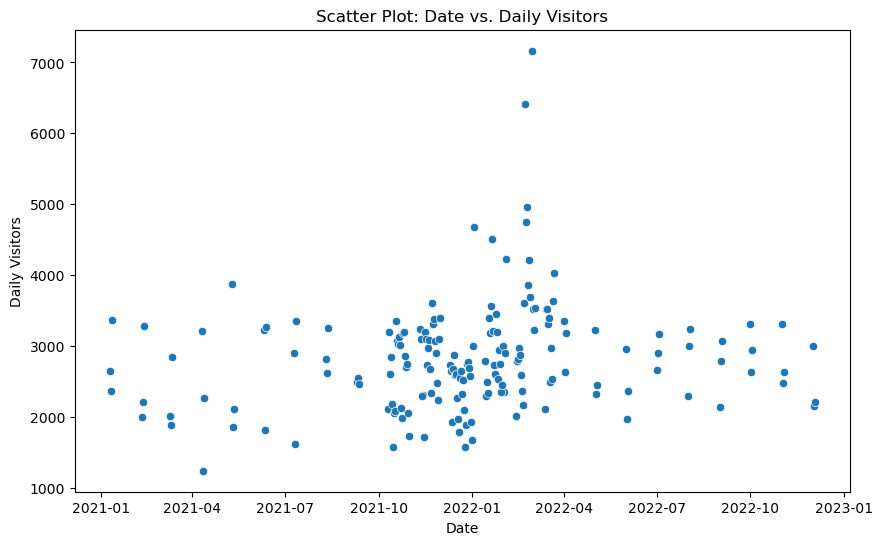

In [66]:
# Create scatter plots to visualize relationships between traffic and other variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Daily Visitors', data=traffic_data)
plt.xlabel('Date')
plt.ylabel('Daily Visitors')
plt.title('Scatter Plot: Date vs. Daily Visitors')
plt.show()

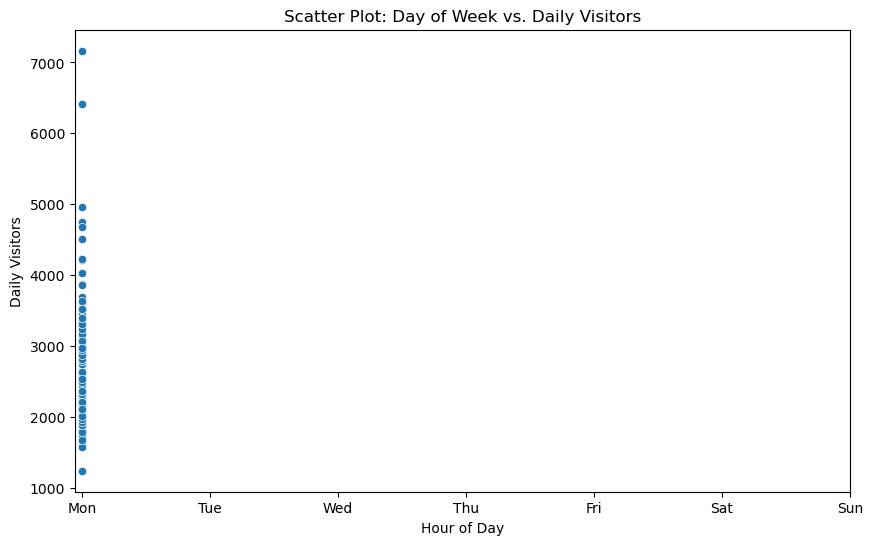

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour_of_day', y='Daily Visitors', data=traffic_data)
plt.xlabel('Hour of Day')
plt.ylabel('Daily Visitors')
plt.title('Scatter Plot: Day of Week vs. Daily Visitors')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

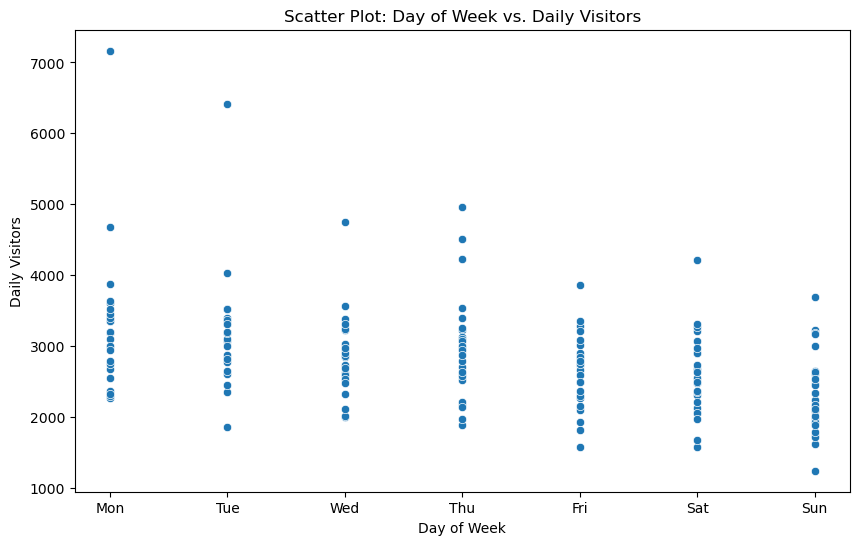

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='day_of_week', y='Daily Visitors', data=traffic_data)
plt.xlabel('Day of Week')
plt.ylabel('Daily Visitors')
plt.title('Scatter Plot: Day of Week vs. Daily Visitors')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

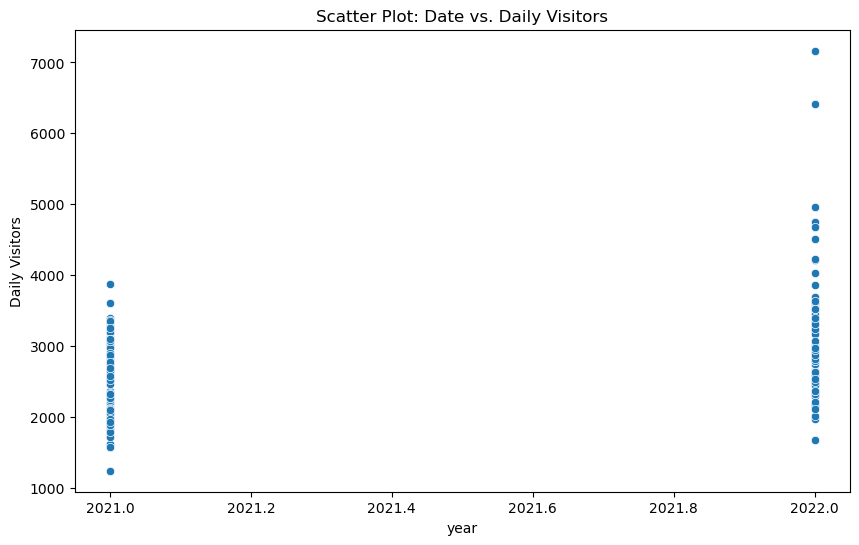

In [67]:
# Create scatter plots to visualize relationships between traffic and other variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='Daily Visitors', data=traffic_data)
plt.xlabel('year')
plt.ylabel('Daily Visitors')
plt.title('Scatter Plot: Date vs. Daily Visitors')
plt.show()

# Segmentation and Categorization

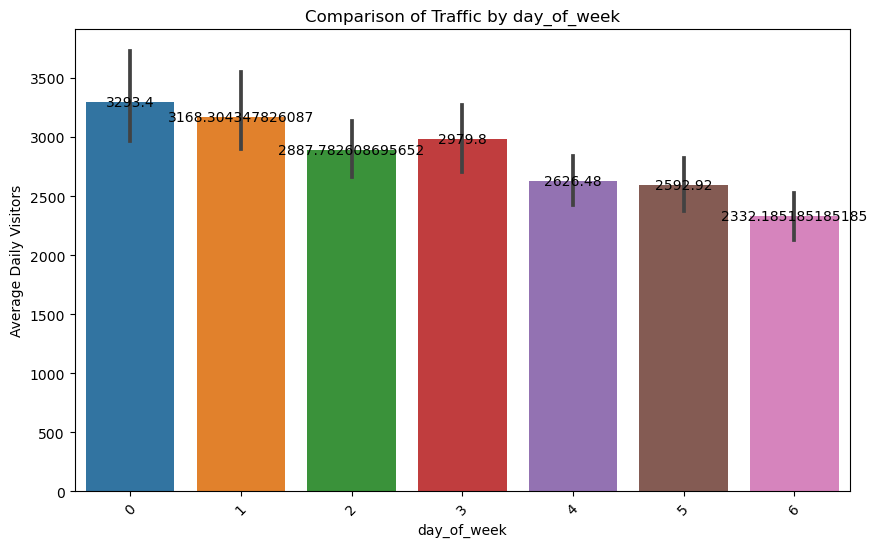

In [89]:
# Assuming you have categorical variables like 'type_of_traffic', 'source', 'destination'
# Create a bar chart to compare traffic among different types of traffic
plt.figure(figsize=(10, 6))
tarplot=sns.barplot(x='day_of_week', y='Daily Visitors', data=traffic_data)
plt.xlabel('day_of_week')
plt.ylabel('Average Daily Visitors')
for p in tarplot.patches:
    tarplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.title('Comparison of Traffic by day_of_week')
plt.xticks(rotation=45)
plt.show()

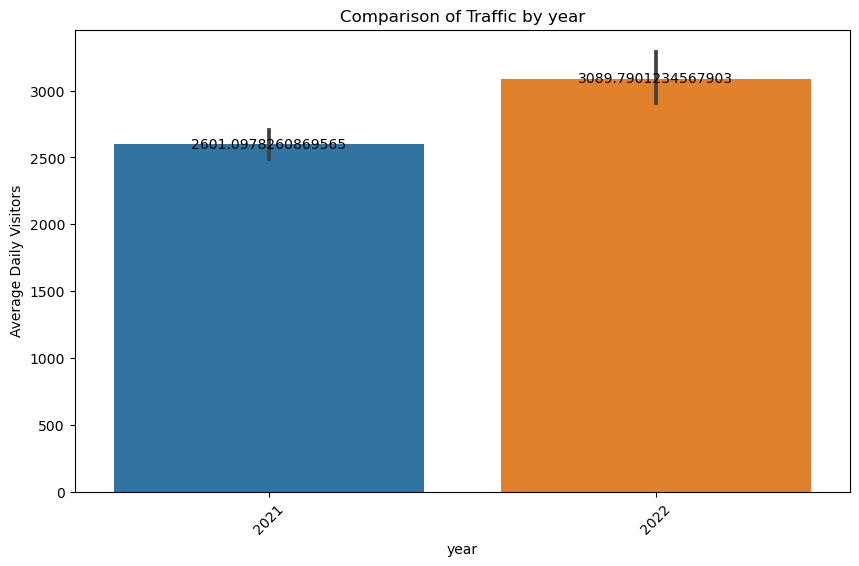

In [88]:
# Assuming you have categorical variables like 'type_of_traffic', 'source', 'destination'
# Create a bar chart to compare traffic among different types of traffic
plt.figure(figsize=(10, 6))
tarplot=sns.barplot(x='year', y='Daily Visitors', data=traffic_data)
plt.xlabel('year')
plt.ylabel('Average Daily Visitors')
for p in tarplot.patches:
    tarplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.title('Comparison of Traffic by year')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

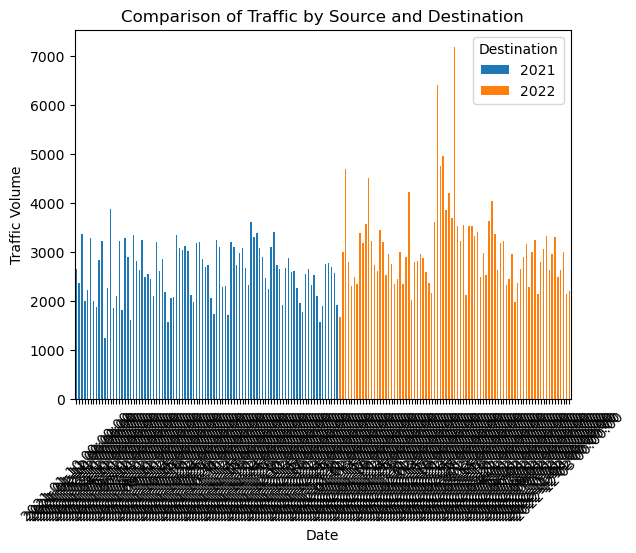

In [76]:
# Create a stacked bar chart to compare traffic among different sources and destinations
plt.figure(figsize=(10, 6))
traffic_data.groupby(['Date', 'year'])['Daily Visitors'].sum().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Comparison of Traffic by Source and Destination')
plt.xticks(rotation=45)
plt.legend(title='Destination', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1000x600 with 0 Axes>

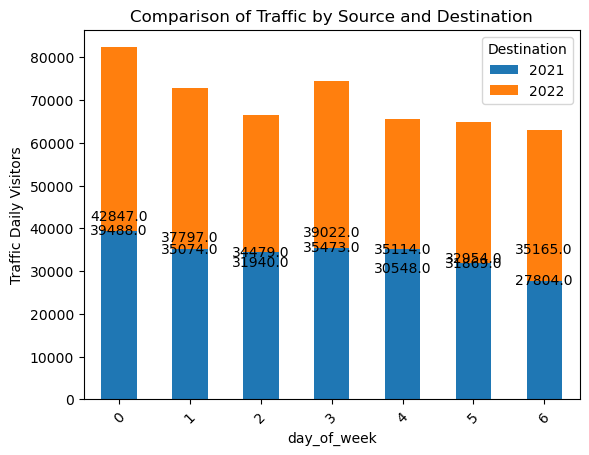

In [91]:
# Create a stacked bar chart to compare traffic among different sources and destinations
plt.figure(figsize=(10, 6))
tarplot=traffic_data.groupby(['day_of_week', 'year'])['Daily Visitors'].sum().unstack().plot(kind='bar', stacked=True)
plt.xlabel('day_of_week')
plt.ylabel('Traffic Daily Visitors')
for p in tarplot.patches:
    tarplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.title('Comparison of Traffic by Source and Destination')
plt.xticks(rotation=45)
plt.legend(title='Destination', bbox_to_anchor=(1, 1))
plt.show()

# Hypothesis Testing